In [19]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


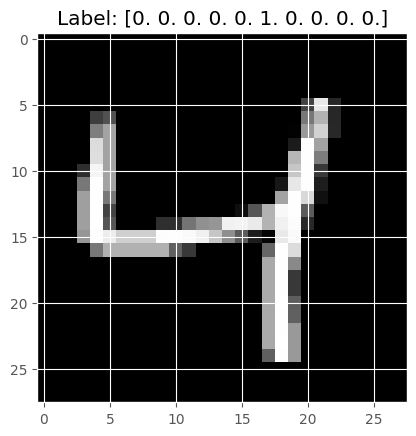

In [23]:
# Load MNIST dataset (images and labels)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to be in the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the images to be compatible with CNN input (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Check the shape of the training data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Display a sample image
plt.imshow(x_train[2].reshape(28, 28), cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()

In [24]:
# Create a sequential model
model = Sequential()

# Add first convolutional layer (32 filters, 3x3 kernel, ReLU activation)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add max pooling layer (2x2 pool size)
model.add(MaxPooling2D((2, 2)))

# Add second convolutional layer (64 filters, 3x3 kernel, ReLU activation)
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add max pooling layer (2x2 pool size)
model.add(MaxPooling2D((2, 2)))

# Flatten the 2D output to 1D
model.add(Flatten())

# Add fully connected (dense) layers
model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons (one for each class)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()

C:\Users\sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=10, 
                    validation_data=(x_test, y_test), 
                    verbose=2)

Epoch 1/10
469/469 - 14s - 29ms/step - accuracy: 0.9427 - loss: 0.1958 - val_accuracy: 0.9823 - val_loss: 0.0532
Epoch 2/10
469/469 - 12s - 25ms/step - accuracy: 0.9832 - loss: 0.0562 - val_accuracy: 0.9883 - val_loss: 0.0383
Epoch 3/10
469/469 - 12s - 26ms/step - accuracy: 0.9882 - loss: 0.0390 - val_accuracy: 0.9888 - val_loss: 0.0329
Epoch 4/10
469/469 - 12s - 25ms/step - accuracy: 0.9906 - loss: 0.0297 - val_accuracy: 0.9868 - val_loss: 0.0389
Epoch 5/10
469/469 - 12s - 26ms/step - accuracy: 0.9918 - loss: 0.0251 - val_accuracy: 0.9894 - val_loss: 0.0354
Epoch 6/10
469/469 - 12s - 25ms/step - accuracy: 0.9937 - loss: 0.0193 - val_accuracy: 0.9885 - val_loss: 0.0341
Epoch 7/10
469/469 - 12s - 26ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9908 - val_loss: 0.0283
Epoch 8/10
469/469 - 12s - 25ms/step - accuracy: 0.9960 - loss: 0.0119 - val_accuracy: 0.9905 - val_loss: 0.0304
Epoch 9/10
469/469 - 11s - 24ms/step - accuracy: 0.9965 - loss: 0.0105 - val_accuracy: 0.9896 - 

In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4780 - loss: 1.4662
Test accuracy: 47.89%


In [6]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[1])
plt.show()
print(np.argmax(predicted_value[1], axis=0))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.44      0.65      0.53      1000
           1       0.69      0.52      0.59      1000
           2       0.36      0.43      0.39      1000
           3       0.33      0.48      0.39      1000
           4       0.47      0.27      0.35      1000
           5       0.39      0.35      0.37      1000
           6       0.57      0.45      0.50      1000
           7       0.59      0.51      0.54      1000
           8       0.54      0.66      0.60      1000
           9       0.61      0.47      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000

